# INTRODUCTION

"NPRI" name suggests it may be related to the National Pollutant Release Inventory or a similar registry depending on the country. The National Pollutant Release Inventory typically is a database that houses information about pollutants released to the air, water, and land, as well as off-site transfers for recycling or disposal. Governments or environmental agencies usually manage such databases to monitor and report on pollution and waste management practices of industries.

# PROBLEM STATEMENT

 Using the historical data in the dataset, the
machine learning task is to forecast the percentage of releases to disposals in the next five
years.



# ALIGNMENT DATASET

The alignment between these two datasets is beneficial for several reasons, especially for analyzing environmental impacts, regulatory compliance, and industry trends over time. Here’s **why** **the** **alignment** **is** **good**:

**Consistent Industry and Facility Information**: Both datasets include detailed information about the facilities, including the NPRI ID, company name, and facility name. This consistency allows for accurate matching between records in the two datasets, facilitating a comprehensive analysis of environmental impacts or compliance status of specific facilities over time.

**Substance and Emission Details:** Both datasets provide detailed information about the substances released or transferred, including specific chemicals or pollutants, quantities, and the year of the report. This enables trend analysis on specific pollutants, allowing for targeted environmental strategies or policies.

**Geographical Information:** With latitude and longitude data provided in the second dataset, and similar locational identifiers expected in the first (though not explicitly shown in the snippet), mapping the geographical distribution of emissions or disposals becomes possible. This can help in identifying regions with high levels of pollution or areas that might require more stringent regulations.

**Category and NAICS Codes:** The inclusion of categories (such as Water, Air, DisposalsTransfers) and NAICS (North American Industry Classification System) codes allows for analyses across different industry sectors. This can help in understanding sector-specific environmental footprints and identifying industries that might need to adopt greener practices.

**Employee Numbers:** With the number of employees listed, one can investigate correlations between facility size, industry type, and environmental impact. This could be crucial for understanding how workforce size relates to pollution levels or for tailoring environmental policies to different sizes of operations.

**Temporal Aspect:** The datasets cover multiple years, offering a temporal dimension that enables trend analysis. By aligning data from different years, it’s possible to assess how environmental impacts change over time, whether due to regulatory actions, technological improvements, or shifts in industrial practices.

**Detailed Metrics and Comments:** The inclusion of specific metrics like quantity of substances, changes, averages, standard deviations, and even comments on substances by category provides a deep level of detail for analysis. This can be used for advanced statistical analyses, risk assessments, and in-depth research into the effectiveness of environmental policies or practices.

Together, these aspects of alignment facilitate a multifaceted analysis of environmental data. They enable stakeholders to identify trends, assess the effectiveness of regulations, and develop targeted strategies for reducing pollution and enhancing sustainability across industries and regions.

**Why we don't choose other dataset:**

Actually we did a lot of research where we found alot of dataset on Kaggle and the more relevant one were the these two
1. National Pollutant Release Inventory Canada 2017 https://www.kaggle.com/code/mitchroman/national-pollutant-release-canada-heatmap-2017/notebook

2. Starter: National Pollutant Release 34dee843-2 https://www.kaggle.com/code/kerneler/starter-national-pollutant-release-34dee843-2


When we explored these and tried to find out the best match. Both of them didn't qualified just of different features they didn't match so we choose the NPRI dataset which we explained above.

In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading our data
df1 = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
df1.head()

,issueid,reportid,priority,issuetype,reportyear,npriid,companyname,facilityname,naics,category,sub-category,cas,substancename,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,numofemployees
0,57733,335210,6,Trend,2022,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,tonnes,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568318,5
1,57740,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),tonnes,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126126,6
2,57745,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),tonnes,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166,43837.627693,46252.286544,6
3,57746,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),tonnes,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6
4,57765,335221,6,Trend,2022,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,tonnes,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654799,16


In [ ]:
df1.nunique()

issueid                  14151
reportid                  3275
priority                     7
issuetype                    3
reportyear                   1
npriid                    3273
companyname               1175
facilityname              3236
naics                      224
category                     8
sub-category                13
cas                        197
substancename              197
units                        4
currentyear              10434
yearminus1               10186
yearminus2                7804
yearminus3                6539
yearminus4                5853
percentchange            11945
differencechange         11747
fouryearavg              11840
naicssubstanceavg         3533
numstandarddeviation     12620
standarddeviation         2941
naicssubstancecount        131
naicssubstancetotal       3509
overallsubstancetotal      521
numofemployees             490
dtype: int64

# MERGING DATASET

we are merging the NPRI Data for QC dataset which were provided in  data preparation , As, we didn't find any other suitable dataset which can fit better with the unclean datatset file. we looked for other datasets but they didn't had any common features to merge.

In [ ]:
# Loading the second dataset to merge with our data
df2= pd.read_csv('/content/NPRI Data for QC.xlsx - NPRI Data for review.csv')
df2.head()

<ipython-input-32-1bc9e1b23dd2>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_csv('/content/NPRI Data for QC.xlsx - NPRI Data for review.csv')


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Group,Category,Latitude,Longitude,ProvinceEn,Detail_UnitType_NameEn,NAICSPrimary,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,Number of employees
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22.63,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16.67,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15.94,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13.25,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12.48,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0


In [ ]:
df2.rename(columns={"NpriID":"npriid",'NPRI_Report_ReportYear':'reportyear','Company name':'companyname','FacilityName':'facilityname','NAICSPrimary':'naics','Category':'category','Cas':'cas','Detail_NPRI_SubstanceInfo_NameEn':'substancename','Detail_UnitType_NameEn':'units','Number of employees':'numofemployees'}, inplace=True)

In [ ]:
df2.head()

,npriid,companyname,facilityname,reportyear,Quantity,cas,substancename,Group,category,Latitude,Longitude,ProvinceEn,units,naics,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022,numofemployees
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22.63,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16.67,NA - M08,Total particulate matter,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15.94,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13.25,630-08-0,Carbon monoxide,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12.48,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Releases to Air,Stack / Point,45.869119,-72.530779,Quebec,tonnes,321999,All other miscellaneous wood product manufactu...,NaN,NaN,170.0


Why we choosed outer over inner, left, or right join types depends on the desired result of your data merge:

Outer Join (how='outer'):

Use Case: You want to retain all records from both dataframes, filling in missing matches with NaN. This is useful when you need a complete picture of all available data, even if some data is missing on either side.
Result: Returns all rows from both df1 and df2, with NaN in places where there is no match.

Inner Join (how='inner'):

Use Case: we are interested only in rows that have matching values in both dataframes, based on the specified keys. This is typically used when you want to work only with records that have complete data in both dataframes.
Result: Returns only the rows from both df1 and df2 where there are matching values for all specified keys, excluding all rows where there is no match.

Left Join (how='left'):

Use Case: we want to retain all records from the left dataframe (df1) and only the matching records from the right dataframe (df2). Non-matching rows in the right dataframe will result in NaN values in the merged dataframe for the columns coming from df2.
Result: Returns all rows from df1 and matched rows from df2, with NaN in places where there is no match for df2.

Right Join (how='right'):

Use Case: we want to retain all records from the right dataframe (df2) and only the matching records from the left dataframe (df1). Non-matching rows in the left dataframe will result in NaN values in the merged dataframe for the columns coming from df1.
Result: Returns all rows from df2 and matched rows from df1, with NaN in places where there is no match for df1.

Choosing how='outer' ensures that no data is lost from either dataframe, which can be particularly important in analyses where the presence of a record in either dataframe is significant. This approach provides a comprehensive view of the combined datasets, although it may require additional data cleaning or handling of NaN values post-merge.

In [ ]:
# Merge the two dataframes on the npriid
# Use how="outer" to keep all the rows from the initial dataset "data"
# Use suffixes to distinguish the columns from each dataframe
df = pd.merge(df1, df2, on=['npriid','reportyear','companyname','facilityname','naics','category','cas','substancename','units','numofemployees'], how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551701 entries, 0 to 551700
Data columns (total 37 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   issueid                                                  14151 non-null   float64
 1   reportid                                                 14151 non-null   float64
 2   priority                                                 14151 non-null   float64
 3   issuetype                                                14151 non-null   object 
 4   reportyear                                               551701 non-null  int64  
 5   npriid                                                   551701 non-null  int64  
 6   companyname                                              551691 non-null  object 
 7   facilityname                                             551536 non-null  object 
 8   naics         

In [ ]:
df.head()

,issueid,reportid,priority,issuetype,reportyear,npriid,companyname,facilityname,naics,category,sub-category,cas,substancename,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,numofemployees,Quantity,Group,Latitude,Longitude,ProvinceEn,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022
0,57733.0,335210.0,6.0,Trend,2022,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,tonnes,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101.0,73328.025600,81561.568318,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57740.0,335213.0,6.0,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),tonnes,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105.0,11225.000530,33430.126126,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57745.0,335213.0,6.0,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),tonnes,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166.0,43837.627693,46252.286544,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57746.0,335213.0,6.0,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),tonnes,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149.0,4190.920093,5418.433552,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57765.0,335221.0,6.0,Trend,2022,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,tonnes,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118.0,2989.246371,493869.654799,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,issueid,reportid,priority,issuetype,reportyear,npriid,companyname,facilityname,naics,category,sub-category,cas,substancename,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,numofemployees,Quantity,Group,Latitude,Longitude,ProvinceEn,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022
0,57733.0,335210.0,6.0,Trend,2022,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,Direct Discharges,NA - 17,Nitrate ion in solution at pH >= 6.0,tonnes,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101.0,73328.025600,81561.568318,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57740.0,335213.0,6.0,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,Sum of Disposals and Transfers,NA - 16,Ammonia (total),tonnes,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105.0,11225.000530,33430.126126,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57745.0,335213.0,6.0,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 16,Ammonia (total),tonnes,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166.0,43837.627693,46252.286544,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57746.0,335213.0,6.0,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,Spills,NA - 22,Phosphorus (total),tonnes,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149.0,4190.920093,5418.433552,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57765.0,335221.0,6.0,Trend,2022,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,Road dust,NA - M08,Total particulate matter,tonnes,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118.0,2989.246371,493869.654799,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sorted= df.sort_values(by=['npriid','substancename','reportyear'],ascending=[True,True,True])
df_sorted

,issueid,reportid,priority,issuetype,reportyear,npriid,companyname,facilityname,naics,category,sub-category,cas,substancename,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,numofemployees,Quantity,Group,Latitude,Longitude,ProvinceEn,NAICSTitleEn,Substance comments by category for 2022,Substance comments for disposals and all media for 2022
27229,NaN,NaN,NaN,NaN,2015,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,All Media,NaN,107-06-2,"1,2-Dichloroethane",tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.0,0.220,Sum of release to all media (<1tonne),54.923116,-112.861867,Alberta,Chemical pulp mills,NaN,NaN
7354,95903.0,347900.0,6.0,Trend,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,VOC_Stack,Stack / Point,107-06-2,"1,2-Dichloroethane",tonnes,0.073,0.19698,0.274,1.8759,1.841,-0.629404,-0.12398,0.235490,0.145504,-0.259177,0.279747,5.0,0.727519,2.283876,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27254,NaN,NaN,NaN,NaN,2015,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Stack / Point,NaN,106-99-0,"1,3-Butadiene",tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.0,0.120,Releases to Air,54.923116,-112.861867,Alberta,Chemical pulp mills,NaN,NaN
7347,95886.0,347900.0,6.0,Trend,2022,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,VOC_NonStack,Stack / Point,106-99-0,"1,3-Butadiene",tonnes,0.003,0.06469,0.061,0.0500,0.050,-0.953625,-0.06169,0.056423,0.016942,-0.779483,0.017887,4.0,0.067769,19.791030,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27167,NaN,NaN,NaN,NaN,2015,1,Alberta-Pacific Forest Industries Inc.,Alberta-Pacific Forest Industries Inc.,322112,Stack / Point,NaN,56-49-5,3-Methylcholanthrene,kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.0,0.920,Releases to Air,54.923116,-112.861867,Alberta,Chemical pulp mills,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551180,NaN,NaN,NaN,NaN,2020,500352,Canadian Natural Resources Limited,Wapiti Compressor Station 07-24-068-07W6,211110,Stack / Point,NaN,NA - M16,Volatile Organic Compounds (VOCs),tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.355,Releases to Air,54.899664,-118.925345,Alberta,Oil and gas extraction (except oil sands),0,NaN
551253,NaN,NaN,NaN,NaN,2021,500474,Southwest Agromart,Ridgetown,325314,All Media,NaN,NA - 22,Phosphorus (total),tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.634,Sum of release to all media (<1tonne),42.501806,-82.182660,Ontario,Mixed fertilizer manufacturing,NaN,NaN
551264,NaN,NaN,NaN,NaN,2022,500474,Southwest Agromart,Ridgetown,325314,All Media,NaN,NA - 22,Phosphorus (total),tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.540,Sum of release to all media (<1tonne),42.501806,-82.182660,Ontario,Mixed fertilizer manufacturing,0,NaN
551559,NaN,NaN,NaN,NaN,2021,500474,Southwest Agromart,Ridgetown,325314,All Media,NaN,NA - 14,Zinc (and its compounds),tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011,Sum of release to all media (<1tonne),42.501806,-82.182660,Ontario,Mixed fertilizer manufacturing,NaN,NaN


In [ ]:
# prompt: group df by npriid and substancename and show

df.groupby(['npriid', 'substancename']).size().unstack()


substancename,"1,1,1,2-Tetrachloroethane","1,1,2,2-Tetrachloroethane","1,1,2-Trichloroethane","1,1-Methylenebis(4-isocyanatocyclohexane)","1,2,4-Trichlorobenzene","1,2,4-Trimethylbenzene","1,2-Dichloroethane","1,2-Dichloropropane","1,3-Butadiene","1,4-Benzenediamine, N,N'-mixed phenyl and tolyl de","1,4-Benzenediamine, N,N'-mixed phenyl and tolyl derivatives","1,4-Dioxane",1-Nitropyrene,"2,6-Di-t-butyl-4-methylphenol",2-(2-Methoxyethoxy)ethanol,2-Butoxyethanol,2-Ethoxyethanol,2-Ethoxyethyl acetate,2-Mercaptobenzothiazole,2-Methoxyethanol,"2-Propanone, reaction products with diphenylamine",3-Methylcholanthrene,5-Methylchrysene,"7,12-Dimethylbenz[a]anthracene","7H-Dibenzo[c,g]carbazole",Acenaphthene,Acenaphthylene,Acetaldehyde,Acetonitrile,Acetophenone,Acetylene,Acrolein,Acrylamide,Acrylic acid (and its salts),Acrylonitrile,Allyl alcohol,Aluminum (fume or dust only),Aluminum oxide (fibrous forms only),Ammonia (total),Analytically unresolved hydrocarbons (C10 to C16+),Aniline (and its salts),Anthracene,Antimony (and its compounds),Arsenic (and its compounds),Asbestos (friable form only),Azo disperse dyes,Benz[a]anthracene,Benzene,Benzo[a]pyrene,Benzo[b]fluoranthene,Benzo[e]pyrene,Benzo[ghi]perylene,Benzo[j]fluoranthene,Benzo[k]fluoranthene,Benzoyl peroxide,Benzyl chloride,Biphenyl,Bis(2-ethylhexyl) adipate,Bis(2-ethylhexyl) phthalate,Bisphenol A,Bromine,Bromomethane,Butane (all isomers),Butene (all isomers),Butyl acetate (all isomers),Butyl acrylate,Butyl benzyl phthalate,Butyraldehyde,C.I. Basic Green 4,CFC-11,CFC-12,Cadmium (and its compounds),Calcium fluoride,Carbon disulphide,Carbon monoxide,Carbon tetrachloride,Carbonyl sulphide,Catechol,"Chlorinated alkanes, long-chain, CnHxCl(2n+2–x), 1","Chlorinated alkanes, long-chain, CnHxCl(2n+2–x), 18 ≤ n ≤ 20","Chlorinated alkanes, medium-chain, CnHxCl(2n+2–x), 14 ≤ n ≤ 17",Chlorine,Chlorine dioxide,Chloroacetic acid (and its salts),Chlorobenzene,Chloroethane,Chloroform,Chloromethane,Chromium (and its compounds),Chrysene,Cobalt (and its compounds),Copper (and its compounds),"Cresol (all isomers, and their salts)",Cumene,Cumene hydroperoxide,Cyanides (ionic),Cycloheptane (all isomers),Cyclohexane,Cyclohexanol,Cyclohexene (all isomers),Cyclooctane (all isomers),D-Limonene,Decane (all isomers),Di-n-octyl phthalate,"Dibenz[a,h]acridine","Dibenz[a,h]anthracene","Dibenz[a,j]acridine","Dibenzo[a,e]fluoranthene","Dibenzo[a,e]pyrene","Dibenzo[a,h]pyrene","Dibenzo[a,i]pyrene","Dibenzo[a,l]pyrene",Dibutyl phthalate,Dichloromethane,Dicyclopentadiene,Diethanolamine (and its salts),Dimethyl phthalate,Dimethylamine,Dimethylether,Dioxins and furans - total,Diphenylamine,Epichlorohydrin,Ethanol,Ethyl acetate,Ethyl acrylate,Ethylbenzene,Ethylene,Ethylene glycol,Ethylene oxide,Ethylene thiourea,Ethyltoluene (all isomers),Fluoranthene,Fluorene,Fluorine,Formaldehyde,Formic acid,HCFC-123 (all isomers),HCFC-124 (all isomers),HCFC-142b,HCFC-22,Heavy aromatic solvent naphtha,Heptane (all isomers),Hexachlorobenzene,Hexane (all isomers excluding n-hexane),Hexavalent chromium (and its compounds),Hexene (all isomers),Hydrazine (and its salts),Hydrochloric acid,Hydrogen cyanide,Hydrogen fluoride,Hydrogen sulphide,Hydroquinone (and its salts),Hydrotreated heavy naphtha,Hydrotreated light distillate,"Indeno[1,2,3-cd]pyrene",Iron pentacarbonyl,Isophorone diisocyanate,Isoprene,Isopropyl alcohol,Lead (and its compounds),Light aromatic solvent naphtha,Lithium carbonate,Maleic anhydride,Manganese (and its compounds),Mercury (and its compounds),Methanol,Methyl acrylate,Methyl ethyl ketone,Methyl isobutyl ketone,Methyl methacrylate,Methyl tert-butyl ether,Methylcyclopentane,Methylenebis(phenylisocyanate),Molybdenum trioxide,Myrcene,"N,N-Dimethylaniline (and its salts)",N-Methyl-2-pyrrolidone,N-Methylolacrylamide,Naphtha,Naphthalene,Naphthenic acid fraction compounds (and their salt,Naphthenic acid fraction compounds (and their salts),Nickel (and its compounds),Nitrate ion in solution at pH >= 6.0,Nitric acid,Nitrilotriace

In [ ]:
df = df.drop(['issuetype','Substance comments for disposals and all media for 2022','sub-category','substancename', 'Substance comments by category for 2022','Group',	'Latitude',	'Longitude',	'ProvinceEn',	'NAICSTitleEn','numofemployees'], axis=1)

In [ ]:
df = df.dropna(subset=['reportyear'])

In [ ]:
df.nunique()

issueid                   14151
reportid                   3275
priority                      7
reportyear                    9
npriid                    12753
companyname                3831
facilityname              16158
naics                       330
category                     39
cas                         259
units                         5
currentyear               10434
yearminus1                10186
yearminus2                 7804
yearminus3                 6539
yearminus4                 5853
percentchange             11945
differencechange          11747
fouryearavg               11840
naicssubstanceavg          3533
numstandarddeviation      12620
standarddeviation          2941
naicssubstancecount         131
naicssubstancetotal        3509
overallsubstancetotal       521
Quantity                 174709
dtype: int64

In [ ]:
df['report_year'] = df['reportyear']

In [ ]:
df['reportyear'] = pd.to_datetime(df['reportyear'])

In [ ]:
df.set_index('reportyear', inplace=True)

In [ ]:
feature_columns = ['issueid','Quantity','reportid','priority','npriid','companyname','facilityname','naics','category','currentyear','units','yearminus1','yearminus2','yearminus3','yearminus4','percentchange','differencechange','fouryearavg','naicssubstanceavg','numstandarddeviation','standarddeviation','naicssubstancecount','naicssubstancetotal','overallsubstancetotal']
df[feature_columns] = df[feature_columns].interpolate(method='time')


Quantity is expected to be target column in future so we are not filling the missing values here as it would create inconsistency in the dataset.

In [ ]:
missing_values_quantity = df['Quantity'].isnull().sum()
print(f"Number of missing values in 'Quantity': {missing_values_quantity}")


Number of missing values in 'Quantity': 14151


In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

issueid                      0
reportid                     0
priority                     0
npriid                       0
companyname                 10
facilityname               165
naics                        0
category                     0
cas                          0
units                        0
currentyear                  0
yearminus1                   0
yearminus2                   0
yearminus3                   0
yearminus4                   0
percentchange                0
differencechange             0
fouryearavg                  0
naicssubstanceavg            0
numstandarddeviation         0
standarddeviation            0
naicssubstancecount          0
naicssubstancetotal          0
overallsubstancetotal        0
Quantity                 14151
report_year                  0
dtype: int64


In [ ]:
df = df.dropna(subset=['companyname','facilityname'])

Therefore, we are filling the Quantity column with 0 which won't create any impact.

In [ ]:
df.fillna(0, inplace=True)


<ipython-input-51-a616889d5bf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

issueid                  0
reportid                 0
priority                 0
npriid                   0
companyname              0
facilityname             0
naics                    0
category                 0
cas                      0
units                    0
currentyear              0
yearminus1               0
yearminus2               0
yearminus3               0
yearminus4               0
percentchange            0
differencechange         0
fouryearavg              0
naicssubstanceavg        0
numstandarddeviation     0
standarddeviation        0
naicssubstancecount      0
naicssubstancetotal      0
overallsubstancetotal    0
Quantity                 0
report_year              0
dtype: int64


In [ ]:
df.head()

,issueid,reportid,priority,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,57733.0,335210.0,6.0,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,NA - 17,tonnes,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101.0,73328.025600,81561.568318,0.0,2022
1970-01-01 00:00:00.000002022,57740.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,NA - 16,tonnes,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105.0,11225.000530,33430.126126,0.0,2022
1970-01-01 00:00:00.000002022,57745.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,NA - 16,tonnes,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166.0,43837.627693,46252.286544,0.0,2022
1970-01-01 00:00:00.000002022,57746.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,NA - 22,tonnes,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149.0,4190.920093,5418.433552,0.0,2022
1970-01-01 00:00:00.000002022,57765.0,335221.0,6.0,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,NA - M08,tonnes,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118.0,2989.246371,493869.654799,0.0,2022


In [ ]:
df= df.drop_duplicates()

In [ ]:
df.head()

,issueid,reportid,priority,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,57733.0,335210.0,6.0,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,NA - 17,tonnes,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101.0,73328.025600,81561.568318,0.0,2022
1970-01-01 00:00:00.000002022,57740.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,NA - 16,tonnes,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105.0,11225.000530,33430.126126,0.0,2022
1970-01-01 00:00:00.000002022,57745.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,NA - 16,tonnes,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166.0,43837.627693,46252.286544,0.0,2022
1970-01-01 00:00:00.000002022,57746.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,NA - 22,tonnes,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149.0,4190.920093,5418.433552,0.0,2022
1970-01-01 00:00:00.000002022,57765.0,335221.0,6.0,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,NA - M08,tonnes,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118.0,2989.246371,493869.654799,0.0,2022


In [ ]:
#checking unique values
df.nunique()

issueid                   14151
reportid                   3275
priority                      7
npriid                    12748
companyname                3826
facilityname              16158
naics                       330
category                     39
cas                         259
units                         5
currentyear               10434
yearminus1                10186
yearminus2                 7804
yearminus3                 6539
yearminus4                 5853
percentchange             11945
differencechange          11747
fouryearavg               11840
naicssubstanceavg          3533
numstandarddeviation      12620
standarddeviation          2941
naicssubstancecount         131
naicssubstancetotal        3509
overallsubstancetotal       521
Quantity                 174682
report_year                   9
dtype: int64

# FEATURE ENGINEERING

Here we are creating a new column because we need to specify about which substance we are talking about either its Release or Disposal.

In [ ]:
# creating a category type column specifying air, water and land as release in it from category column and others as disposals from the above dataset

def categorized_RD(category):
  if category in ['Air', 'Water', 'Land']:
    return 'Release'
  else:
    return 'Disposal'

df['Category_Type'] = df['category'].apply(categorized_RD)
df.head()


,issueid,reportid,priority,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year,Category_Type
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,57733.0,335210.0,6.0,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,NA - 17,tonnes,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101.0,73328.025600,81561.568318,0.0,2022,Release
1970-01-01 00:00:00.000002022,57740.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,NA - 16,tonnes,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105.0,11225.000530,33430.126126,0.0,2022,Disposal
1970-01-01 00:00:00.000002022,57745.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,NA - 16,tonnes,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166.0,43837.627693,46252.286544,0.0,2022,Release
1970-01-01 00:00:00.000002022,57746.0,335213.0,6.0,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,NA - 22,tonnes,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149.0,4190.920093,5418.433552,0.0,2022,Release
1970-01-01 00:00:00.000002022,57765.0,335221.0,6.0,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,NA - M08,tonnes,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118.0,2989.246371,493869.654799,0.0,2022,Release


# 1. Feature Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545428 entries, 1970-01-01 00:00:00.000002022 to 1970-01-01 00:00:00.000002020
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   issueid                545428 non-null  float64
 1   reportid               545428 non-null  float64
 2   priority               545428 non-null  float64
 3   npriid                 545428 non-null  int64  
 4   companyname            545428 non-null  object 
 5   facilityname           545428 non-null  object 
 6   naics                  545428 non-null  int64  
 7   category               545428 non-null  object 
 8   cas                    545428 non-null  object 
 9   units                  545428 non-null  object 
 10  currentyear            545428 non-null  float64
 11  yearminus1             545428 non-null  float64
 12  yearminus2             545428 non-null  float64
 13  yearminus3             545428 non-n

In [ ]:
from sklearn.preprocessing import LabelEncoder #onehot encoding and target encoding

# Initialize a LabelEncoder for each categorical column
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    # Convert all values to string type
    df[column] = df[column].astype(str)
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df.head()


,issueid,reportid,priority,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year,Category_Type
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,57733.0,335210.0,6.0,11017,817,8167,221320,38,225,4,39.7400,22.6400,18.8300,35.600,19.6000,0.755300,17.1000,24.167500,726.020055,-0.355612,1929.857872,101.0,73328.025600,81561.568318,0.0,2022,1
1970-01-01 00:00:00.000002022,57740.0,335213.0,6.0,10979,823,9879,221320,5,224,4,20.9649,10.9846,19.8522,19.820,13.0392,0.908572,9.9803,15.924000,106.904767,-0.226340,379.694303,105.0,11225.000530,33430.126126,0.0,2022,0
1970-01-01 00:00:00.000002022,57745.0,335213.0,6.0,10979,823,9879,221320,38,224,4,0.0570,8.7988,0.8750,0.333,1.0450,-0.993522,-8.7418,2.762950,264.082095,-0.312018,846.184135,166.0,43837.627693,46252.286544,0.0,2022,1
1970-01-01 00:00:00.000002022,57746.0,335213.0,6.0,10979,823,9879,221320,38,229,4,0.0230,3.9417,0.5980,0.183,0.4980,-0.994165,-3.9187,1.305175,28.126980,-0.377584,74.431036,149.0,4190.920093,5418.433552,0.0,2022,1
1970-01-01 00:00:00.000002022,57765.0,335221.0,6.0,24231,1583,5829,212323,0,253,4,8.1070,4.1360,9.4300,7.671,6.9050,0.960106,3.9710,7.035500,25.332596,-0.220763,78.027725,118.0,2989.246371,493869.654799,0.0,2022,1


Above we did a lebel encoding over one-hot encoding because we have a lot of categorical coulmns if we go with on hot encoding then as a result of that we would get a a large no. of new formed coulmns which is not good here which create incosistenciy in our model so we used lebel encoder because it converts the each categorical value to numerical value in the same column


*below are the coulmns converted into numerical*

**issuetype:** Contains categorical data ('Trend'). Each unique category would be assigned a unique integer.

**companyname:** Text data representing company names. Each company would be assigned a unique integer.

**facilityname:** Text data for facility names. Each facility would be assigned a unique integer.

**category and sub-category:** These categorical fields would each be converted to a set of integers representing the different categories and subcategories.

**cas:** The Chemical Abstracts Service (CAS) number, which is a unique identifier for chemical substances. Even though it's numerical, it's categorical because the numbers are identifiers and don't have a mathematical meaning. Each unique CAS number would be assigned a unique integer.

**units:** This is likely categorical, representing the units of measurement (like 'tonnes'). Each unit type would be assigned a unique integer.

**Category_type** : 0 is for Disposal and 1 is for release which would make easier for the model to learn about the which substance we are talking here.

# 2.Normalization

**Different Scales and Units:**

**currentyear, yearminus1, yearminus2, yearminus3, yearminus4:** These columns appear to represent numerical values across different years and would benefit from normalization, especially if they will be used in predictive models or other analyses where scale matters. for example some values are 39.7400   too high and some are too small like 0.1400


**percentchange, differencechange:** These columns contain numerical values that could be on different scales and may benefit from normalization.


**fouryearavg, naicssubstanceavg:** These average values could vary in scale and might require normalization to ensure comparability.


**numstandarddeviation, standarddeviation:** These statistics are likely on different scales and would need normalization.


**naicssubstancecount, naicssubstancetotal, overallsubstancetotal:** These columns seem to represent count and total values that might vary greatly in magnitude.


**Why we choose Minmaxscaler instead of other ?**

MinMaxScaler scales the data so that all features lie between 0 and 1. This is useful when the data has a wide range of values, and you want to prevent features with larger values from dominating the model.

StandardScaler scales the data so that it has a mean of 0 and a standard deviation of 1. This is useful when the data is normally distributed and you want to ensure that all features have equal importance.

In this case, we use MinMaxScaler because the data has a wide range of values (e.g., Quantity can range from 0 to millions), and we want to prevent Quantity from dominating the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#columns to normalize
columns_to_normalize = ['currentyear', 'yearminus1', 'yearminus2', 'yearminus3', 'yearminus4',
                        'percentchange', 'differencechange',
                        'numstandarddeviation', 'standarddeviation',
                        'naicssubstancecount', 'naicssubstancetotal', 'overallsubstancetotal']

# Normalize these columns
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Now df has the normalized columns
print(df[columns_to_normalize].head())

                               currentyear  yearminus1  yearminus2  \
reportyear                                                           
1970-01-01 00:00:00.000002022     0.045469    0.001529    0.004671   
1970-01-01 00:00:00.000002022     0.043882    0.000742    0.004925   
1970-01-01 00:00:00.000002022     0.042115    0.000594    0.000217   
1970-01-01 00:00:00.000002022     0.042112    0.000266    0.000148   
1970-01-01 00:00:00.000002022     0.042795    0.000279    0.002339   

                               yearminus3  yearminus4  percentchange  \
reportyear                                                             
1970-01-01 00:00:00.000002022    0.137910    0.188640   4.741387e-07   
1970-01-01 00:00:00.000002022    0.135641    0.187262   4.899282e-07   
1970-01-01 00:00:00.000002022    0.132839    0.184744   2.939809e-07   
1970-01-01 00:00:00.000002022    0.132817    0.184630   2.939147e-07   
1970-01-01 00:00:00.000002022    0.133894    0.185975   4.952371e-07   

    


Normalizing these columns ensures that they are on a similar scale, preventing any one feature from dominating the model due to its larger range of values.

# **Feature Engineering**

The historical average serves as a robust baseline metric for forecasting. Predictive models can use this feature to better estimate future releases or disposals by understanding typical past behavior.

In [ ]:
df['historical_avg'] = df[['yearminus4', 'yearminus3', 'yearminus2', 'yearminus1', 'currentyear']].mean(axis=1)


**Operational Stability:** A lower volatility value indicates that a facility's release amounts have been relatively consistent over the years. This could reflect stable operations, consistent demand, and effective waste or emissions management practices


**Operational Fluctuations:** Conversely, a higher volatility value suggests significant fluctuations in release amounts, which could be due to various factors such as operational changes, regulatory impacts, seasonal demand variations, or changes in environmental management practices.

In [ ]:
df['volatility'] = df[['yearminus4', 'yearminus3', 'yearminus2', 'yearminus1', 'currentyear']].std(axis=1)


**It provides insight into how significant a particular substance is within an industry (as denoted by the NAICS code). A higher ratio suggests that the substance is more commonly used or released within that industry, which might indicate its importance to industry processes or its potential environmental impact within that sector.**

In [ ]:
df['naics_substance_ratio'] = df['naicssubstancecount'] / df['naicssubstancetotal']


In [ ]:
df = df.dropna(subset=['naics_substance_ratio'])

**Individual companies may have specific policies, technologies, or practices that influence their environmental impact. Understanding a company's trend can offer insights into its future behavior.**

In [ ]:
df['company_avg_percent_change'] = df.groupby('companyname')['percentchange'].transform('mean')
df['facility_avg_difference_change'] = df.groupby('facilityname')['differencechange'].transform('mean')


<ipython-input-65-1e0a4cfd06ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_avg_percent_change'] = df.groupby('companyname')['percentchange'].transform('mean')
<ipython-input-65-1e0a4cfd06ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facility_avg_difference_change'] = df.groupby('facilityname')['differencechange'].transform('mean')


**This feature captures the average release amount for each substance across all reporting facilities, offering a snapshot of industry-wide behavior concerning specific substances. This is crucial for understanding broader trends, such as which substances are being reduced in usage due to regulatory changes or improvements in environmental technology.**

In [ ]:
df['substance_release_avg'] = df.groupby('cas')['currentyear'].transform('mean')


<ipython-input-66-cc9fcf2d89b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['substance_release_avg'] = df.groupby('cas')['currentyear'].transform('mean')


**This feature indicates the significance of a substance within the total releases or disposals. A high proportion might signal a substance of concern or one that is heavily regulated, affecting future actions.**

In [ ]:
df['substance_to_overall_proportion'] = df['naicssubstancetotal'] / df['overallsubstancetotal']


<ipython-input-67-29ad8b44b707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['substance_to_overall_proportion'] = df['naicssubstancetotal'] / df['overallsubstancetotal']


In [ ]:
df.head()

,issueid,reportid,priority,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year,Category_Type,historical_avg,volatility,naics_substance_ratio,company_avg_percent_change,facility_avg_difference_change,substance_release_avg,substance_to_overall_proportion
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,57733.0,335210.0,6.0,11017,817,8167,221320,38,225,4,0.045469,0.001529,0.004671,0.137910,0.188640,4.741387e-07,0.566962,24.167500,726.020055,0.033343,0.023789,0.018619,0.199790,0.006197,0.0,2022,1,0.075644,0.083794,0.093190,4.718517e-07,0.566889,0.045171,32.240818
1970-01-01 00:00:00.000002022,57740.0,335213.0,6.0,10979,823,9879,221320,5,224,4,0.043882,0.000742,0.004925,0.135641,0.187262,4.899282e-07,0.566689,15.924000,106.904767,0.036160,0.004680,0.019363,0.030584,0.002540,0.0,2022,0,0.074490,0.083174,0.633122,4.667388e-07,0.566865,0.045127,12.041206
1970-01-01 00:00:00.000002022,57745.0,335213.0,6.0,10979,823,9879,221320,38,224,4,0.042115,0.000594,0.000217,0.132839,0.184744,2.939809e-07,0.565973,2.762950,264.082095,0.034293,0.010431,0.030721,0.119440,0.003514,0.0,2022,1,0.072102,0.083002,0.257204,4.667388e-07,0.566865,0.045127,33.988771
1970-01-01 00:00:00.000002022,57746.0,335213.0,6.0,10979,823,9879,221320,38,229,4,0.042112,0.000266,0.000148,0.132817,0.184630,2.939147e-07,0.566157,1.305175,28.126980,0.032864,0.000917,0.027555,0.011419,0.000412,0.0,2022,1,0.071995,0.083045,2.413198,4.667388e-07,0.566865,0.045098,27.736858
1970-01-01 00:00:00.000002022,57765.0,335221.0,6.0,24231,1583,5829,212323,0,253,4,0.042795,0.000279,0.002339,0.133894,0.185975,4.952371e-07,0.566459,7.035500,25.332596,0.036282,0.000962,0.021784,0.008145,0.037523,0.0,2022,1,0.073056,0.083164,2.674637,5.089613e-07,0.566877,0.045058,0.217056


# 4.Feature Selection

# Heat Map

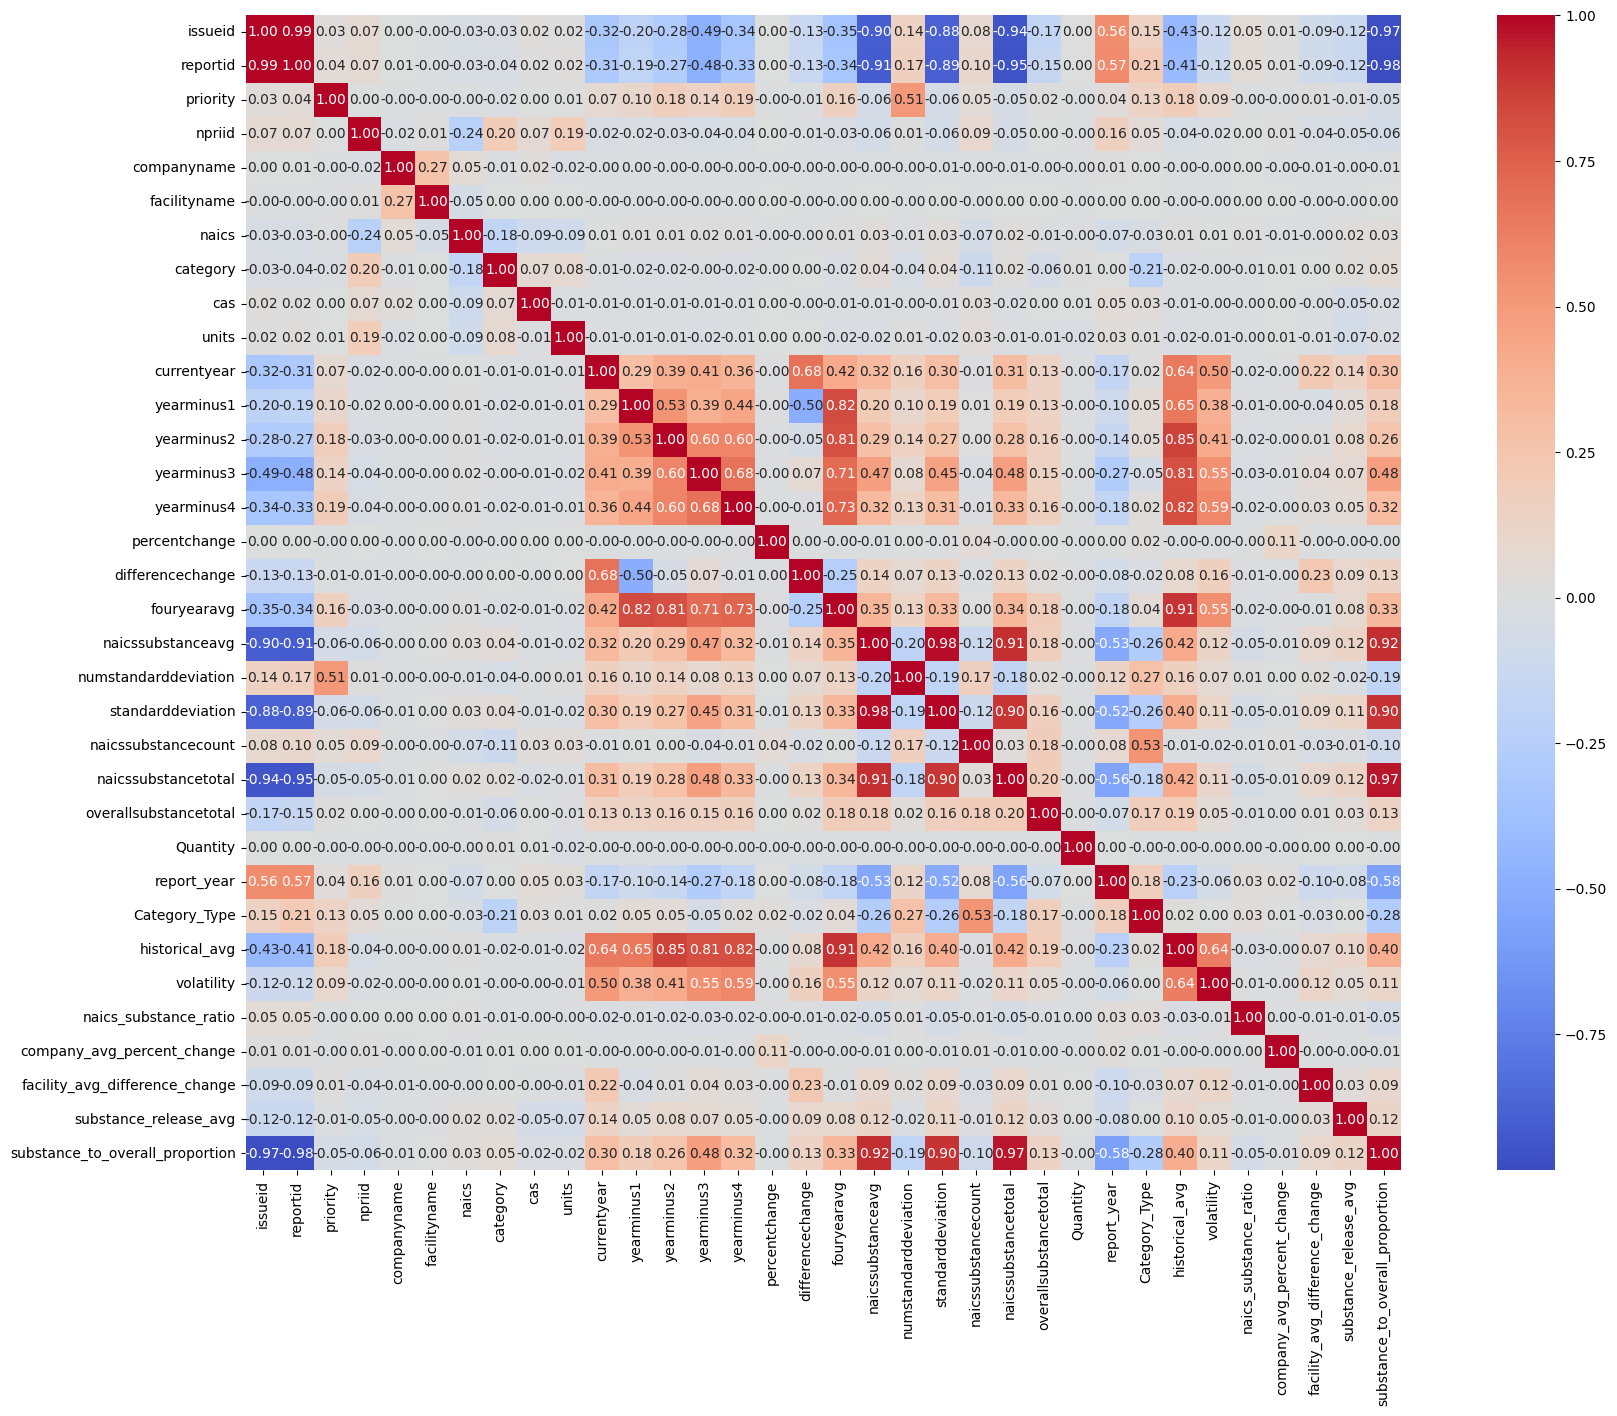

In [ ]:
# prompt: find pearson correlation method for above dataset clear heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')

# Generate a heatmap
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()


 Returns list of lists of feature names with correlations above threshold from correlation_matrix DataFrame.

In [ ]:
def find_highly_correlated_features(correlation_matrix, threshold):

  highly_correlated_features = []
  for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[0]):
      if abs(correlation_matrix.iloc[i, j]) >= threshold:
        feature_pair = [correlation_matrix.index[i], correlation_matrix.index[j]]
        highly_correlated_features.append(feature_pair)

  return highly_correlated_features

# Example usage
correlation_matrix = df.corr()
threshold = 0.9
highly_correlated_features = find_highly_correlated_features(correlation_matrix, threshold)

# Print the highly correlated features
for feature_pair in highly_correlated_features:
  print(f"{feature_pair[0]} and {feature_pair[1]} ")


issueid and reportid 
issueid and naicssubstanceavg 
issueid and naicssubstancetotal 
issueid and substance_to_overall_proportion 
reportid and naicssubstanceavg 
reportid and naicssubstancetotal 
reportid and substance_to_overall_proportion 
fouryearavg and historical_avg 
naicssubstanceavg and standarddeviation 
naicssubstanceavg and naicssubstancetotal 
naicssubstanceavg and substance_to_overall_proportion 
standarddeviation and substance_to_overall_proportion 
naicssubstancetotal and substance_to_overall_proportion 


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Placeholder for df creation (make sure to define your own df properly)
# df = pd.DataFrame(...) # Your DataFrame definition here

# Assuming 'Quantity' is the target variable in your DataFrame 'df'.
# Replace [np.inf, -np.inf] with np.nan, then fillna with median
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Define the initial set of features to include in the model, excluding the target variable.
features = [feature for feature in df.columns if feature != 'Quantity']

# Initialize a variable to track the significance level
significant_level = 0.05

while True:
    # Prepare the features and add a constant term for the intercept
    X = sm.add_constant(df[features])

    # Fit the model
    model = sm.OLS(df['Quantity'], X).fit()

    # Get p-values for each feature, excluding the intercept
    p_values = model.pvalues[1:]  # Exclude the intercept's p-value
    max_p_value = p_values.max()

    # Check if any features have p-values above the significance level
    if max_p_value > significant_level:
        # Find the feature with the highest p-value
        max_p_feature = p_values.idxmax()

        # Remove the feature with the highest p-value from the set of features
        features.remove(max_p_feature)
    else:
        # If no features have a p-value above the significance level, exit the loop
        break

# Print the selected features
print("Selected features based on p-value threshold:", features)


Selected features based on p-value threshold: ['category', 'cas', 'units']


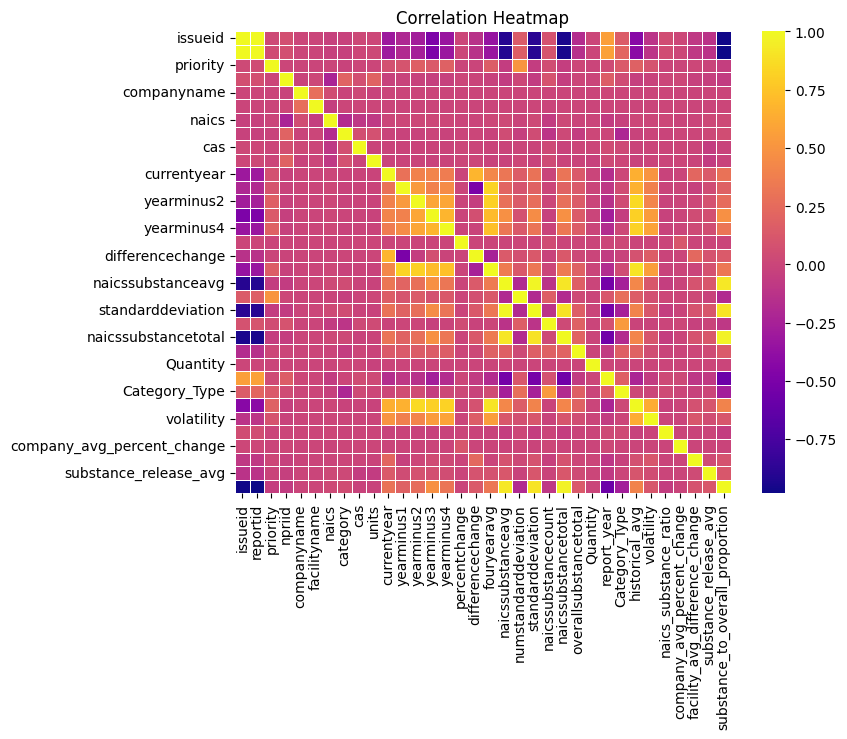

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,  cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Accuracy_scores=[]

In [ ]:
df.head()

,issueid,reportid,priority,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year,Category_Type,historical_avg,volatility,naics_substance_ratio,company_avg_percent_change,facility_avg_difference_change,substance_release_avg,substance_to_overall_proportion
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,57733.0,335210.0,6.0,11017,817,8167,221320,38,225,4,0.045469,0.001529,0.004671,0.137910,0.188640,4.741387e-07,0.566962,24.167500,726.020055,0.033343,0.023789,0.018619,0.199790,0.006197,0.0,2022,1,0.075644,0.083794,0.093190,4.718517e-07,0.566889,0.045171,32.240818
1970-01-01 00:00:00.000002022,57740.0,335213.0,6.0,10979,823,9879,221320,5,224,4,0.043882,0.000742,0.004925,0.135641,0.187262,4.899282e-07,0.566689,15.924000,106.904767,0.036160,0.004680,0.019363,0.030584,0.002540,0.0,2022,0,0.074490,0.083174,0.633122,4.667388e-07,0.566865,0.045127,12.041206
1970-01-01 00:00:00.000002022,57745.0,335213.0,6.0,10979,823,9879,221320,38,224,4,0.042115,0.000594,0.000217,0.132839,0.184744,2.939809e-07,0.565973,2.762950,264.082095,0.034293,0.010431,0.030721,0.119440,0.003514,0.0,2022,1,0.072102,0.083002,0.257204,4.667388e-07,0.566865,0.045127,33.988771
1970-01-01 00:00:00.000002022,57746.0,335213.0,6.0,10979,823,9879,221320,38,229,4,0.042112,0.000266,0.000148,0.132817,0.184630,2.939147e-07,0.566157,1.305175,28.126980,0.032864,0.000917,0.027555,0.011419,0.000412,0.0,2022,1,0.071995,0.083045,2.413198,4.667388e-07,0.566865,0.045098,27.736858
1970-01-01 00:00:00.000002022,57765.0,335221.0,6.0,24231,1583,5829,212323,0,253,4,0.042795,0.000279,0.002339,0.133894,0.185975,4.952371e-07,0.566459,7.035500,25.332596,0.036282,0.000962,0.021784,0.008145,0.037523,0.0,2022,1,0.073056,0.083164,2.674637,5.089613e-07,0.566877,0.045058,0.217056


In [ ]:
merged_data1=df.drop(columns={'issueid','reportid','priority'},axis=1)
merged_data1.head()

,npriid,companyname,facilityname,naics,category,cas,units,currentyear,yearminus1,yearminus2,yearminus3,yearminus4,percentchange,differencechange,fouryearavg,naicssubstanceavg,numstandarddeviation,standarddeviation,naicssubstancecount,naicssubstancetotal,overallsubstancetotal,Quantity,report_year,Category_Type,historical_avg,volatility,naics_substance_ratio,company_avg_percent_change,facility_avg_difference_change,substance_release_avg,substance_to_overall_proportion
reportyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,11017,817,8167,221320,38,225,4,0.045469,0.001529,0.004671,0.137910,0.188640,4.741387e-07,0.566962,24.167500,726.020055,0.033343,0.023789,0.018619,0.199790,0.006197,0.0,2022,1,0.075644,0.083794,0.093190,4.718517e-07,0.566889,0.045171,32.240818
1970-01-01 00:00:00.000002022,10979,823,9879,221320,5,224,4,0.043882,0.000742,0.004925,0.135641,0.187262,4.899282e-07,0.566689,15.924000,106.904767,0.036160,0.004680,0.019363,0.030584,0.002540,0.0,2022,0,0.074490,0.083174,0.633122,4.667388e-07,0.566865,0.045127,12.041206
1970-01-01 00:00:00.000002022,10979,823,9879,221320,38,224,4,0.042115,0.000594,0.000217,0.132839,0.184744,2.939809e-07,0.565973,2.762950,264.082095,0.034293,0.010431,0.030721,0.119440,0.003514,0.0,2022,1,0.072102,0.083002,0.257204,4.667388e-07,0.566865,0.045127,33.988771
1970-01-01 00:00:00.000002022,10979,823,9879,221320,38,229,4,0.042112,0.000266,0.000148,0.132817,0.184630,2.939147e-07,0.566157,1.305175,28.126980,0.032864,0.000917,0.027555,0.011419,0.000412,0.0,2022,1,0.071995,0.083045,2.413198,4.667388e-07,0.566865,0.045098,27.736858
1970-01-01 00:00:00.000002022,24231,1583,5829,212323,0,253,4,0.042795,0.000279,0.002339,0.133894,0.185975,4.952371e-07,0.566459,7.035500,25.332596,0.036282,0.000962,0.021784,0.008145,0.037523,0.0,2022,1,0.073056,0.083164,2.674637,5.089613e-07,0.566877,0.045058,0.217056


In [ ]:
merged_data1.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data1.fillna(merged_data1.median(), inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x=merged_data1.drop(columns={'Quantity'},axis=1)
y=merged_data1['Quantity']

In [ ]:
# Split the dataset based on the year as specified
train_data = merged_data1[merged_data1['report_year'].between(2014, 2019)]
val_data = merged_data1[merged_data1['report_year'].between(2020, 2021)]
test_data = merged_data1[merged_data1['report_year'] == 2022]

In [ ]:
X_train = train_data.drop('Quantity', axis=1)
y_train = train_data['Quantity']
X_val = val_data.drop('Quantity', axis=1)
y_val = val_data['Quantity']
X_test = test_data.drop('Quantity', axis=1)
y_test = test_data['Quantity']

In [ ]:
RF = RandomForestRegressor(n_estimators=10, max_depth=2, min_impurity_decrease=2)

In [ ]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, min_impurity_decrease=2, n_estimators=10)

In [ ]:
from sklearn.metrics import mean_squared_error
y_val_pred = RF.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')

Validation MSE: 16070259716.248632


In [ ]:
y_test_pred = RF.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')

Test MSE: 24203110141.841393


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with all the features
correlation_matrix = df.corr()

# Define a threshold for high correlation
threshold = 0.8  # This is an example value, adjust it based on your requirements

# Find features that are highly correlated
highly_correlated_pairs = set()
selected_features = ['Quantity','report_year']

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # If the correlation is high
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            # Add the pair of correlated features to the set
            highly_correlated_pairs.add((colname_i, colname_j))

# Select one feature from each pair
for pair in highly_correlated_pairs:
    # This is a simple approach that keeps the first feature of each pair
    # You might want to adjust the logic for selecting which feature to keep
    selected_features.append(pair[0])

# Print or store the list of features to keep
print(selected_features)


['Quantity', 'report_year', 'substance_to_overall_proportion', 'naicssubstancetotal', 'historical_avg', 'fouryearavg', 'substance_to_overall_proportion', 'naicssubstanceavg', 'naicssubstancetotal', 'standarddeviation', 'reportid', 'substance_to_overall_proportion', 'naicssubstancetotal', 'naicssubstancetotal', 'fouryearavg', 'substance_to_overall_proportion', 'historical_avg', 'substance_to_overall_proportion', 'standarddeviation', 'standarddeviation', 'historical_avg', 'historical_avg', 'naicssubstanceavg']


In [ ]:
merged_data2=df[selected_features]
merged_data2.head()

,Quantity,report_year,substance_to_overall_proportion,naicssubstancetotal,historical_avg,fouryearavg,substance_to_overall_proportion,naicssubstanceavg,naicssubstancetotal,standarddeviation,reportid,substance_to_overall_proportion,naicssubstancetotal,naicssubstancetotal,fouryearavg,substance_to_overall_proportion,historical_avg,substance_to_overall_proportion,standarddeviation,standarddeviation,historical_avg,historical_avg,naicssubstanceavg
reportyear,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000002022,0.0,2022,32.240818,0.199790,0.075644,24.167500,32.240818,726.020055,0.199790,0.023789,335210.0,32.240818,0.199790,0.199790,24.167500,32.240818,0.075644,32.240818,0.023789,0.023789,0.075644,0.075644,726.020055
1970-01-01 00:00:00.000002022,0.0,2022,12.041206,0.030584,0.074490,15.924000,12.041206,106.904767,0.030584,0.004680,335213.0,12.041206,0.030584,0.030584,15.924000,12.041206,0.074490,12.041206,0.004680,0.004680,0.074490,0.074490,106.904767
1970-01-01 00:00:00.000002022,0.0,2022,33.988771,0.119440,0.072102,2.762950,33.988771,264.082095,0.119440,0.010431,335213.0,33.988771,0.119440,0.119440,2.762950,33.988771,0.072102,33.988771,0.010431,0.010431,0.072102,0.072102,264.082095
1970-01-01 00:00:00.000002022,0.0,2022,27.736858,0.011419,0.071995,1.305175,27.736858,28.126980,0.011419,0.000917,335213.0,27.736858,0.011419,0.011419,1.305175,27.736858,0.071995,27.736858,0.000917,0.000917,0.071995,0.071995,28.126980
1970-01-01 00:00:00.000002022,0.0,2022,0.217056,0.008145,0.073056,7.035500,0.217056,25.332596,0.008145,0.000962,335221.0,0.217056,0.008145,0.008145,7.035500,0.217056,0.073056,0.217056,0.000962,0.000962,0.073056,0.073056,25.332596


In [ ]:
merged_data2.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data2.fillna(merged_data1.median(), inplace=True)

<ipython-input-87-40e22424fd78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-87-40e22424fd78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2.fillna(merged_data1.median(), inplace=True)


In [ ]:
x=merged_data2.drop(columns={'Quantity'},axis=1)
y=merged_data2['Quantity']

In [ ]:
# Split the dataset based on the year as specified
train_data = merged_data2[merged_data2['report_year'].between(2014, 2019)]
val_data = merged_data2[merged_data2['report_year'].between(2020, 2021)]
test_data = merged_data2[merged_data2['report_year'] == 2022]

In [ ]:
X_train = train_data.drop('Quantity', axis=1)
y_train = train_data['Quantity']
X_val = val_data.drop('Quantity', axis=1)
y_val = val_data['Quantity']
X_test = test_data.drop('Quantity', axis=1)
y_test = test_data['Quantity']

In [ ]:
RF = RandomForestRegressor(n_estimators=10, max_depth=4, min_impurity_decrease=2)

In [ ]:
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_impurity_decrease=2, n_estimators=10)

In [ ]:
y_val_pred = RF.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')

Validation MSE: 16203453107.219517


In [ ]:
y_test_pred = RF.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')

Test MSE: 24322814180.874977
